Problem Statement:

In the real estate industry, determining the appropriate rental price for a property is crucial for
property owners, tenants, and property management companies. Accurate rent predictions can
help landlords set competitive prices, tenants make informed rental decisions, and property
management companies optimize their portfolio management.
The goal of this project is to develop a data-driven model that predicts the rental price of
residential properties based on relevant features. By analyzing historical rental data and
property attributes, the model aims to provide accurate and reliable rent predictions.

```
# This is formatted as code
```



In [374]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [375]:
data = pd.read_excel('/content/House_Rent_Train.xlsx')


# **Data Preprocessing**

In [376]:
pd.set_option('display.max_columns', 500)

In [377]:
data.columns

Index(['id', 'type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'amenities',
       'water_supply', 'building_type', 'balconies', 'rent'],
      dtype='object')

In [378]:
data.head()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,0,SEMI_FURNISHED,BOTH,1250,25.0,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3.0,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0


In [379]:
data.tail()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
20550,19,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,SEMI_FURNISHED,BOTH,1650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20551,20,BHK2,NaN,NaN,NaN,NaN,NaN,0,0,0,1,SEMI_FURNISHED,BOTH,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20552,21,BHK2,NaN,NaN,NaN,NaN,NaN,1,1,0,1,SEMI_FURNISHED,BOTH,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20553,22,BHK2,NaN,NaN,NaN,NaN,NaN,0,1,0,0,SEMI_FURNISHED,BOTH,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20554,23,BHK1,NaN,NaN,NaN,NaN,NaN,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [380]:
print("total_columns ----->>>>>", data.shape[1])
print("total_rows----->>>>>", data.shape[0])

total_columns ----->>>>> 25
total_rows----->>>>> 20555


In [381]:
data.drop(columns = ['id'],inplace=True)

In [382]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20555 entries, 0 to 20554
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   type             20528 non-null  object 
 1   locality         20395 non-null  object 
 2   activation_date  20532 non-null  object 
 3   latitude         20532 non-null  float64
 4   longitude        20532 non-null  float64
 5   lease_type       20532 non-null  object 
 6   gym              20555 non-null  int64  
 7   lift             20555 non-null  int64  
 8   swimming_pool    20555 non-null  int64  
 9   negotiable       20555 non-null  int64  
 10  furnishing       20555 non-null  object 
 11  parking          20555 non-null  object 
 12  property_size    20555 non-null  int64  
 13  property_age     20532 non-null  float64
 14  bathroom         20532 non-null  float64
 15  facing           20532 non-null  object 
 16  cup_board        20532 non-null  float64
 17  floor       

In [383]:
#need to change activation data object to dateandtime
# bathroom float to int
#cup_board float to int
#floor float to int
#total_floor float to int
#amenities convert to right format
#balconies float to int


In [384]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_values = pd.DataFrame({'percent_missing': percent_missing})
missing_values.sort_values(by ='percent_missing' , ascending=False)



,percent_missing
locality,0.778399
type,0.131355
balconies,0.111895
building_type,0.111895
water_supply,0.111895
amenities,0.111895
total_floor,0.111895
floor,0.111895
cup_board,0.111895
facing,0.111895


In [385]:
print(data.isnull().sum().sort_values(ascending=False))

locality           160
type                27
balconies           23
building_type       23
water_supply        23
amenities           23
total_floor         23
floor               23
cup_board           23
facing              23
bathroom            23
property_age        23
rent                23
lease_type          23
longitude           23
latitude            23
activation_date     23
parking              0
furnishing           0
negotiable           0
swimming_pool        0
lift                 0
gym                  0
property_size        0
dtype: int64


*IMPUTATION*

In [386]:
data.dropna(subset=['locality'], inplace=True)

In [387]:
data['type'].value_counts()

BHK2        11591
BHK3         4356
BHK1         3586
RK1           550
BHK4          232
BHK4PLUS       30
bhk2           16
bhk3           12
1BHK1           4
Name: type, dtype: int64

In [388]:
data['type'].fillna(data['type'].mode()[0], inplace = True)

In [389]:
# Assuming 'data' is the name of your DataFrame

# Mapping to consolidate similar categories
type_mapping = {
    'BHK2': 'BHK2',
    'bhk2': 'BHK2',
    'BHK3': 'BHK3',
    'bhk3': 'BHK3',
    'BHK1': 'BHK1',
    'RK1': 'RK1',
    'BHK4': 'BHK4',
    'BHK4PLUS': 'BHK4PLUS',
    '1BHK1': 'BHK1'
}

# Apply the mapping to the 'type' column
data['type'] = data['type'].map(type_mapping)

# Verify the changes
print(data['type'].value_counts())

BHK2        11625
BHK3         4368
BHK1         3590
RK1           550
BHK4          232
BHK4PLUS       30
Name: type, dtype: int64


In [390]:
print(data.isnull().sum().sort_values(ascending=False))

type               0
locality           0
balconies          0
building_type      0
water_supply       0
amenities          0
total_floor        0
floor              0
cup_board          0
facing             0
bathroom           0
property_age       0
property_size      0
parking            0
furnishing         0
negotiable         0
swimming_pool      0
lift               0
gym                0
lease_type         0
longitude          0
latitude           0
activation_date    0
rent               0
dtype: int64


*CONVERT INTO RIGHT FORMAT*

In [391]:
## Convert 'activation' column to datetime
data['activation_date'] = pd.to_datetime(data['activation_date'])

In [392]:
data['activation_date'].dtype

dtype('<M8[ns]')

In [393]:
# Replace 'bathroom', 'cup_board', 'floor', 'total_floor', 'balconies' with the actual column names

data['bathroom'] = data['bathroom'].astype(int)
data['cup_board'] = data['cup_board'].astype(int)
data['floor'] = data['floor'].astype(int)
data['total_floor'] = data['total_floor'].astype(int)
data['balconies'] = data['balconies'].astype(int)
data['property_age'] = data['property_age'].astype(int)
data['rent'] = data['rent'].astype(int)

In [394]:
#data['amenities'][0]
data['amenities'][3]

'{"LIFT":false,"GYM":false,"INTERNET":false,"AC":false,"CLUB":false,"INTERCOM":false,"POOL":false,"CPA":false,"FS":false,"SERVANT":false,"SECURITY":false,"SC":false,"GP":false,"PARK":false,"RWH":false,"STP":false,"HK":false,"PB":false,"VP":false}'

In [395]:
import json

# Assuming 'data' is the name of your DataFrame
data['amenities'] = data['amenities'].apply(json.loads)
data['true_amenities_count'] = data['amenities'].apply(lambda x: list(x.values()).count(True))


In [396]:
data.drop(columns = 'amenities', inplace = True)

In [397]:
data['locality'].value_counts()

Whitefield                                                                                        903
HSR Layout                                                                                        682
Banashankari                                                                                      644
Marathahalli                                                                                      473
Bellandur                                                                                         433
                                                                                                 ... 
Simhadri layout                                                                                     1
Skylark Esta, Seetharampalya, Bengaluru, Karnataka, India                                           1
23d, 2nd A Cross Rd, Srinivasnagar, Banashankari, Bengaluru, Karnataka 560050, India,Bengaluru      1
Wilson Garden,                                                                    

In [398]:
data['balconies'].value_counts()

1     7957
0     5871
2     4649
3     1582
4      288
5       40
6        4
10       3
13       1
Name: balconies, dtype: int64

In [399]:
data['building_type'].value_counts()

IF    9194
AP    8808
IH    2376
GC      17
Name: building_type, dtype: int64

In [400]:
data['water_supply'].value_counts()

CORP_BORE      10629
CORPORATION     6695
BOREWELL        3071
Name: water_supply, dtype: int64

In [401]:
data['total_floor'].value_counts()

2     4835
4     4789
3     4642
1     2099
5     1480
0      360
14     239
6      211
12     209
9      206
10     195
11     195
8      180
13     170
7      167
15     124
19      69
16      64
18      52
17      37
20      25
21      18
23       9
24       7
25       5
22       4
26       4
Name: total_floor, dtype: int64

In [402]:
data.activation_date.value_counts()

2017-04-11 18:11:00    4
2018-01-27 12:06:00    3
2018-03-14 12:03:00    3
2018-10-06 21:26:00    3
2018-12-06 18:31:00    3
                      ..
2018-07-16 18:08:00    1
2018-10-04 09:29:00    1
2018-02-23 13:51:00    1
2017-02-10 14:07:00    1
2018-11-02 15:22:00    1
Name: activation_date, Length: 19435, dtype: int64

In [403]:
data.latitude.value_counts()

12.939517    67
12.902062    46
12.969800    42
12.904365    27
12.966168    25
             ..
12.949237     1
12.903039     1
12.939441     1
12.900420     1
12.915114     1
Name: latitude, Length: 17628, dtype: int64

In [404]:
data.longitude.value_counts()

77.730667    67
77.664076    46
77.749947    42
77.707085    27
77.724777    25
             ..
77.698189     1
77.700769     1
77.706519     1
77.730321     1
77.567166     1
Name: longitude, Length: 17620, dtype: int64

In [405]:
data.lease_type.value_counts()

FAMILY      10119
ANYONE       9634
BACHELOR      584
COMPANY        58
Name: lease_type, dtype: int64

In [406]:
data.lease_type.value_counts()

FAMILY      10119
ANYONE       9634
BACHELOR      584
COMPANY        58
Name: lease_type, dtype: int64

In [407]:
data.gym.value_counts()

0    15773
1     4622
Name: gym, dtype: int64

In [408]:
data.lift.value_counts()

0    13024
1     7371
Name: lift, dtype: int64

In [409]:
data.swimming_pool.value_counts()

0    16834
1     3561
Name: swimming_pool, dtype: int64

In [410]:
data.negotiable.value_counts()

1    14510
0     5885
Name: negotiable, dtype: int64

In [411]:
data.furnishing.value_counts()

SEMI_FURNISHED     17805
NOT_FURNISHED       1424
FULLY_FURNISHED     1166
Name: furnishing, dtype: int64

In [412]:
data.parking.value_counts()

BOTH            10747
TWO_WHEELER      7177
FOUR_WHEELER     1436
NONE             1035
Name: parking, dtype: int64

NONE means there is not available parking facility

In [413]:
data.property_size.value_counts()

1200    1768
600     1447
1000    1295
800     1082
1100     891
        ... 
1434       1
195        1
2807       1
1628       1
3040       1
Name: property_size, Length: 1136, dtype: int64

In [414]:
data.property_age.value_counts()

 0      3312
 10     2853
 5      2743
 1      2107
 3      1890
 2      1321
 4       977
 8       948
 7       819
 15      772
 6       771
 20      413
 12      341
 9       325
 25      127
 13      101
 30      100
 11       99
 14       82
 18       59
 16       42
 17       42
-1        33
 40       17
 22       14
 50       12
 19       11
 21       11
 35        9
 23        8
 27        6
 34        5
 45        4
 24        4
 28        3
 26        3
 33        3
 100       2
 37        1
 42        1
 60        1
 80        1
 49        1
 400       1
Name: property_age, dtype: int64

In [415]:
data.bathroom.value_counts()

2     11220
1      6222
3      2630
4       285
5        33
6         3
21        1
7         1
Name: bathroom, dtype: int64

In [416]:
data.facing.value_counts()

E     9469
N     5891
W     2613
S     1211
NE     810
SE     193
NW     149
SW      59
Name: facing, dtype: int64

In [417]:
data.cup_board.value_counts()

2        8525
3        3771
1        3721
0        1866
4        1309
5         443
6         421
8         114
7          77
10         75
9          36
12         17
15          6
11          5
20          4
16          2
13          1
40          1
48026       1
Name: cup_board, dtype: int64

In [418]:
data.floor.value_counts()

1     5854
0     4964
2     4514
3     2567
4     1182
5      292
6      204
7      187
9      130
8      119
10     100
11      86
12      57
14      44
13      31
15      23
16      16
17       9
19       6
18       5
20       3
25       1
22       1
Name: floor, dtype: int64

In [419]:
data.total_floor.value_counts()

2     4835
4     4789
3     4642
1     2099
5     1480
0      360
14     239
6      211
12     209
9      206
10     195
11     195
8      180
13     170
7      167
15     124
19      69
16      64
18      52
17      37
20      25
21      18
23       9
24       7
25       5
22       4
26       4
Name: total_floor, dtype: int64

In [420]:
data.water_supply.value_counts()

CORP_BORE      10629
CORPORATION     6695
BOREWELL        3071
Name: water_supply, dtype: int64

In [421]:
data.building_type.value_counts()

IF    9194
AP    8808
IH    2376
GC      17
Name: building_type, dtype: int64

In [422]:
data.balconies.value_counts()

1     7957
0     5871
2     4649
3     1582
4      288
5       40
6        4
10       3
13       1
Name: balconies, dtype: int64

In [423]:
data.rent.value_counts()

15000    1334
20000    1327
25000    1088
12000    1037
18000    1001
         ... 
19700       1
17300       1
18350       1
12200       1
23150       1
Name: rent, Length: 206, dtype: int64

In [424]:
data.true_amenities_count.value_counts()

3     3487
1     3283
2     2268
4     2118
0     1189
5     1108
6      861
7      773
8      708
9      642
10     601
11     595
15     502
13     491
12     486
14     468
16     372
17     240
18     124
19      79
Name: true_amenities_count, dtype: int64

In [425]:
data.columns


Index(['type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'water_supply',
       'building_type', 'balconies', 'rent', 'true_amenities_count'],
      dtype='object')

**OUTLIERS**

In [426]:
data.describe()


,latitude,longitude,gym,lift,swimming_pool,negotiable,property_size,property_age,bathroom,cup_board,floor,total_floor,balconies,rent,true_amenities_count
count,20395.000000,20395.000000,20395.000000,20395.000000,20395.000000,20395.000000,20395.000000,20395.000000,20395.000000,20395.000000,20395.000000,20395.000000,20395.000000,20395.000000,20395.000000
mean,12.945744,77.637259,0.226624,0.361412,0.174602,0.711449,1061.802942,5.774749,1.858446,4.566119,1.870066,3.798431,1.148321,19054.638147,5.242854
std,0.029590,0.110737,0.418658,0.480421,0.379635,0.453100,591.730876,6.360262,0.711163,336.278556,2.180868,3.182528,0.993218,8433.748929,4.612726
min,12.900004,77.500072,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000
25%,12.918211,77.571944,0.000000,0.000000,0.000000,0.000000,700.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,12500.000000,2.000000
50%,12.943787,77.633393,0.000000,0.000000,0.000000,1.000000,1046.000000,5.000000,2.000000,2.000000,1.000000,3.000000,1.000000,17500.000000,3.000000
75%,12.970924,77.695704,0.000000,1.000000,0.000000,1.000000,1284.000000,10.000000,2.000000,3.000000,2.000000,4.000000,2.000000,24000.000000,8.000000
max,12.999999,80.266346,1.000000,1.000000,1.000000,1.000000,50000.000000,400.000000,21.000000,48026.000000,25.000000,26.000000,13.000000,50000.000000,19.000000


**#I think there is no outliers beacause here all columns going to categorical except rent column**

Feature Engineering

In [427]:
# Define the age categories
bins = [-1, 0, 5, 10, 15, 20, 25, 30, 40, 50, 100, float('inf')]
labels = ['Unknown', 'New', '5-10 years', '10-15 years', '15-20 years', '20-25 years',
          '25-30 years', '30-40 years', '40-50 years', '50-100 years', 'Very Old']

# Create a new column 'age_category'
data['prop_age_category'] = pd.cut(data['property_age'], bins=bins, labels=labels, right=False)

# Display the counts in each age category
print(data['prop_age_category'].value_counts())


New             9607
5-10 years      5606
10-15 years     3476
15-20 years      926
20-25 years      450
25-30 years      139
30-40 years      118
Unknown           33
40-50 years       23
50-100 years      14
Very Old           3
Name: prop_age_category, dtype: int64


In [428]:
import pandas as pd

# Assuming 'activation_date' is the name of your column with activation dates
data['activation_date'] = pd.to_datetime(data['activation_date'])

# Extracting month and day
data['activation_month'] = data['activation_date'].dt.month
data['activation_day'] = data['activation_date'].dt.day

# Display the updated DataFrame
print(data[['activation_date', 'activation_month', 'activation_day']])


          activation_date  activation_month  activation_day
1     2017-09-10 12:48:00                 9              10
2     2018-12-06 22:02:00                12               6
3     2018-07-20 16:22:00                 7              20
4     2018-05-31 17:41:00                 5              31
5     2017-10-24 18:29:00                10              24
...                   ...               ...             ...
20527 2017-12-13 18:08:00                12              13
20528 2017-10-19 20:31:00                10              19
20529 2017-12-21 21:18:00                12              21
20530 2018-06-28 21:58:00                 6              28
20531 2018-08-07 22:31:00                 8               7

[20395 rows x 3 columns]


In [429]:
data.drop(columns=['activation_date', 'activation_day'], inplace=True)

In [430]:
data.drop(columns=['latitude', 'longitude','prop_age_category'], inplace=True)


In [431]:
data

,type,locality,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,true_amenities_count,activation_month
1,BHK2,Bellandur,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4,2,NE,2,3,4,CORPORATION,AP,2,22000,8,9
2,BHK3,Thiruvanmiyur,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6,3,E,3,1,5,CORP_BORE,AP,3,28000,6,12
3,BHK1,Attiguppe,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3,1,E,1,1,2,CORPORATION,IH,0,8000,0,7
4,BHK3,Kodihalli,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15,3,E,4,0,0,CORPORATION,IH,1,45000,3,5
5,BHK1,"Seetharampalya,Hoodi",FAMILY,1,1,1,1,SEMI_FURNISHED,BOTH,1080,0,2,E,1,3,5,CORP_BORE,AP,2,18000,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20527,BHK2,"Gattigere,RR Nagar",ANYONE,1,1,1,1,SEMI_FURNISHED,BOTH,1650,1,3,E,3,4,4,BOREWELL,AP,2,25000,10,12
20528,BHK2,Koramangala 4th Block,ANYONE,0,0,0,1,SEMI_FURNISHED,BOTH,1000,10,2,N,2,1,2,CORPORATION,IH,2,30000,4,10
20529,BHK2,Kumaraswamy Layout,FAMILY,1,1,0,1,SEMI_FURNISHED,BOTH,1000,0,2,W,2,5,5,BOREWELL,AP,2,16000,8,12
20530,BHK2,Indiranagar,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1000,5,2,E,2,2,4,CORP_BORE,AP,3,30000,10,6


In [432]:
pd.DataFrame(data.dtypes.value_counts()).T

,int64,object
0,14,8


In [433]:
data.shape

(20395, 22)

In [434]:
integer_data_cols = [var for var in data.columns if data[var].dtype == 'int64']
integer_data_cols

['gym',
 'lift',
 'swimming_pool',
 'negotiable',
 'property_size',
 'property_age',
 'bathroom',
 'cup_board',
 'floor',
 'total_floor',
 'balconies',
 'rent',
 'true_amenities_count',
 'activation_month']

In [435]:
for i in integer_data_cols:
  print(f'Column "{i}" is divided into "{len(data[i].value_counts())}" categories.')

Column "gym" is divided into "2" categories.
Column "lift" is divided into "2" categories.
Column "swimming_pool" is divided into "2" categories.
Column "negotiable" is divided into "2" categories.
Column "property_size" is divided into "1136" categories.
Column "property_age" is divided into "44" categories.
Column "bathroom" is divided into "8" categories.
Column "cup_board" is divided into "19" categories.
Column "floor" is divided into "23" categories.
Column "total_floor" is divided into "27" categories.
Column "balconies" is divided into "9" categories.
Column "rent" is divided into "206" categories.
Column "true_amenities_count" is divided into "20" categories.
Column "activation_month" is divided into "12" categories.


In [436]:
object_data_cols = [var for var in data.columns if data[var].dtype == 'object']
object_data_cols

['type',
 'locality',
 'lease_type',
 'furnishing',
 'parking',
 'facing',
 'water_supply',
 'building_type']

In [437]:
for i in object_data_cols:
  print(f'Column "{i}" is divided into "{len(data[i].value_counts())}" categories.')

Column "type" is divided into "6" categories.
Column "locality" is divided into "1917" categories.
Column "lease_type" is divided into "4" categories.
Column "furnishing" is divided into "3" categories.
Column "parking" is divided into "4" categories.
Column "facing" is divided into "8" categories.
Column "water_supply" is divided into "3" categories.
Column "building_type" is divided into "4" categories.


## **EDA(data visualization)**

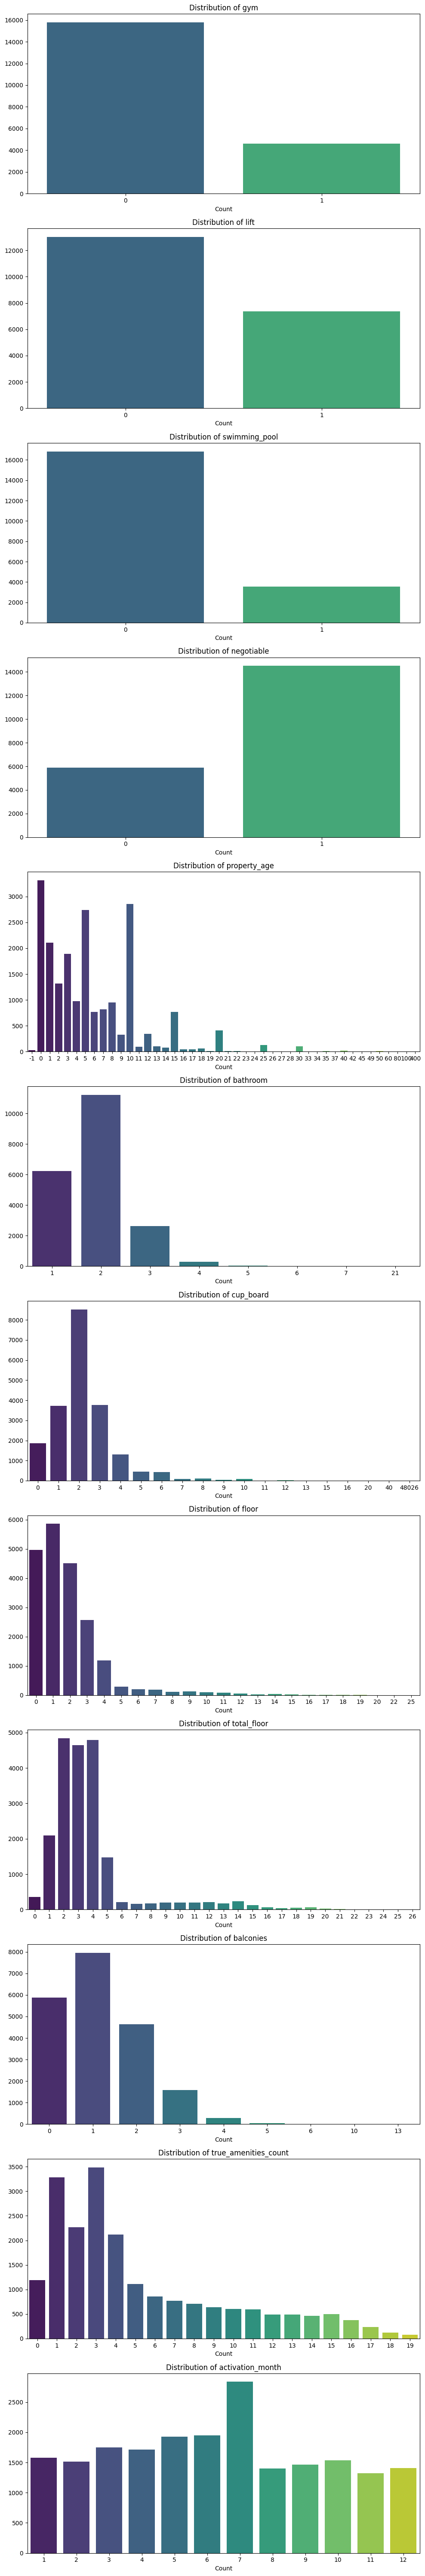

In [438]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is the name of your DataFrame

# List of columns to plot
columns_to_plot = ['gym', 'lift', 'swimming_pool', 'negotiable', 'property_age', 'bathroom', 'cup_board',
                   'floor', 'total_floor', 'balconies', 'true_amenities_count', 'activation_month']

# Set up subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(10, 5 * len(columns_to_plot)))

# Loop through columns and create count plots
for i, column in enumerate(columns_to_plot):
    sns.countplot(x=column, data=data, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()


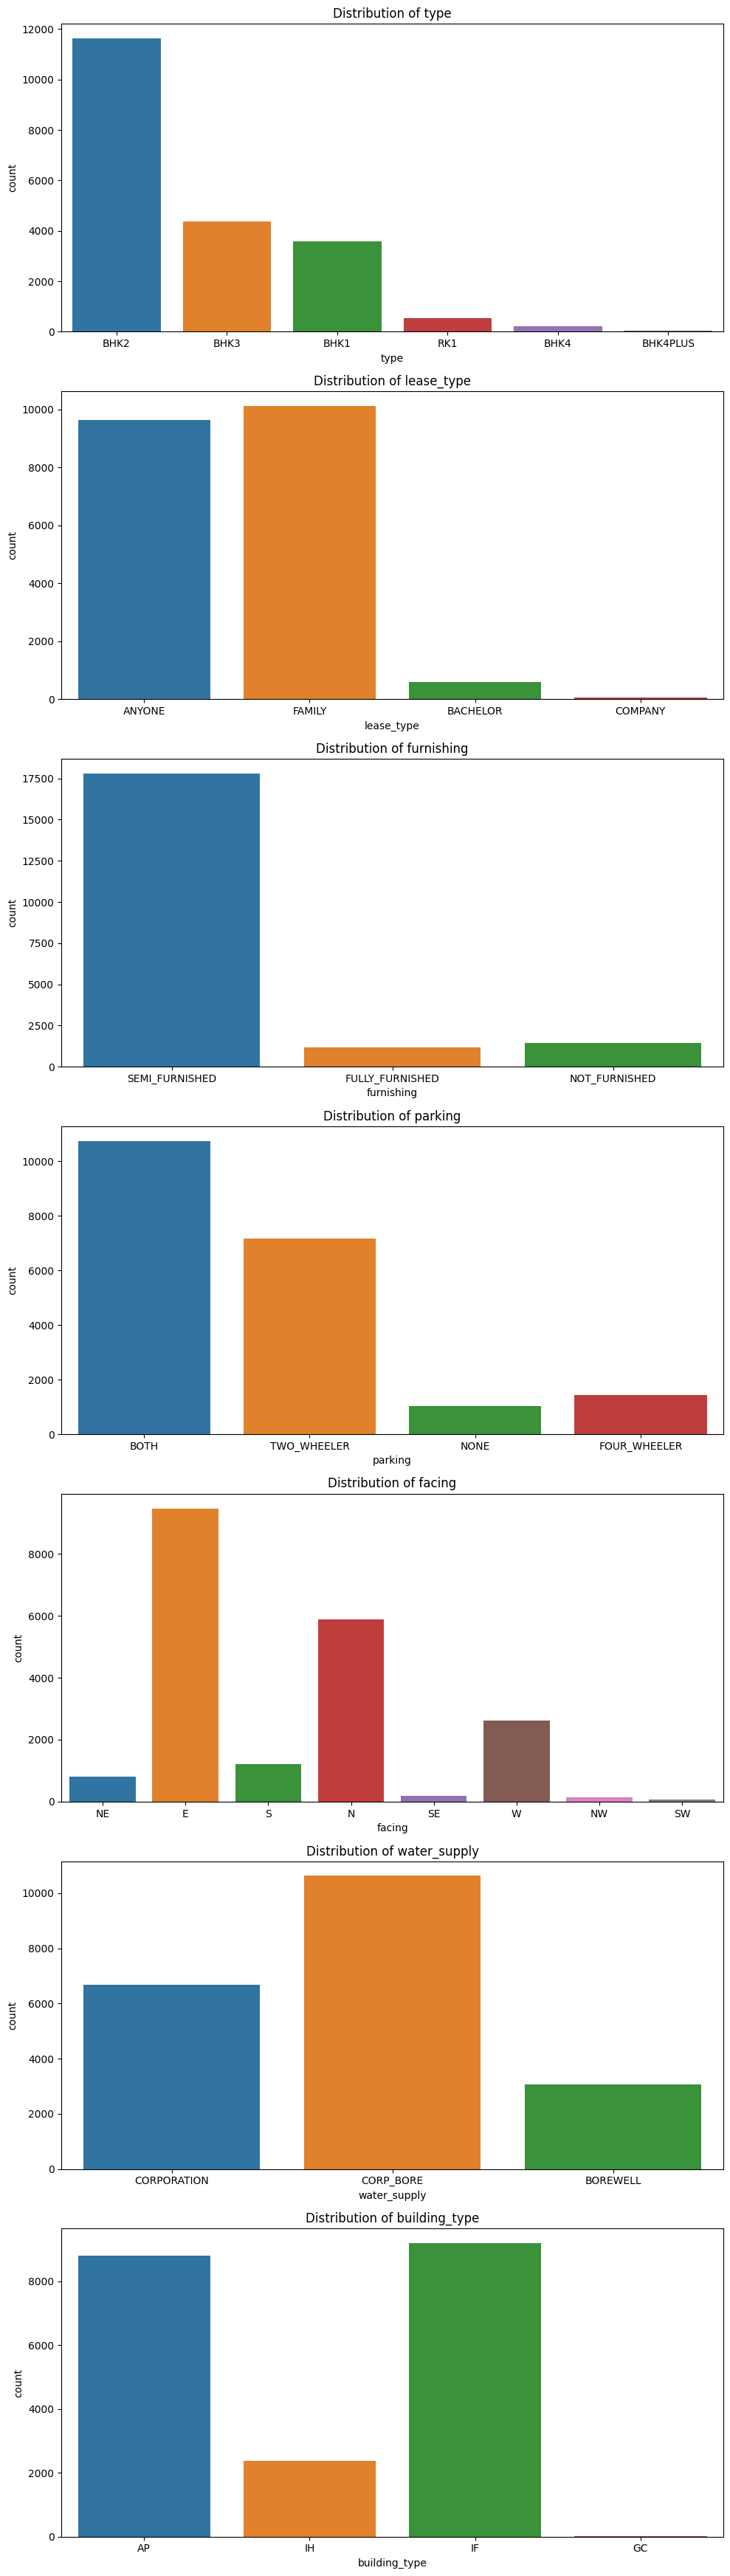

In [439]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is the name of your DataFrame

# List of columns to plot
columns_to_plot = ['type', 'lease_type', 'furnishing', 'parking', 'facing', 'water_supply', 'building_type']

# Set up subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(10, 5 * len(columns_to_plot)))

# Loop through columns and create count plots
for i, column in enumerate(columns_to_plot):
    sns.countplot(x=column, data=data, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


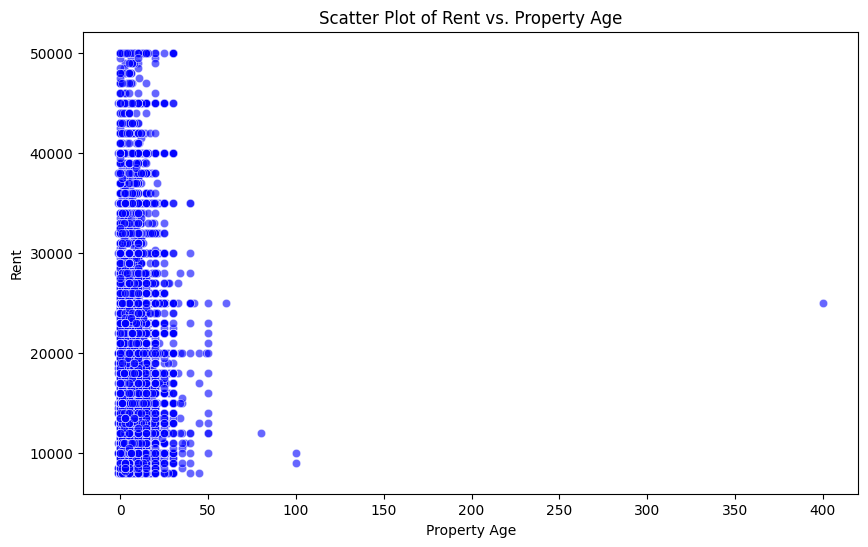

In [440]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is the name of your DataFrame

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(x='property_age', y='rent', data=data, alpha=0.6, color='blue')

# Set plot labels
plt.title('Scatter Plot of Rent vs. Property Age')
plt.xlabel('Property Age')
plt.ylabel('Rent')

plt.show()


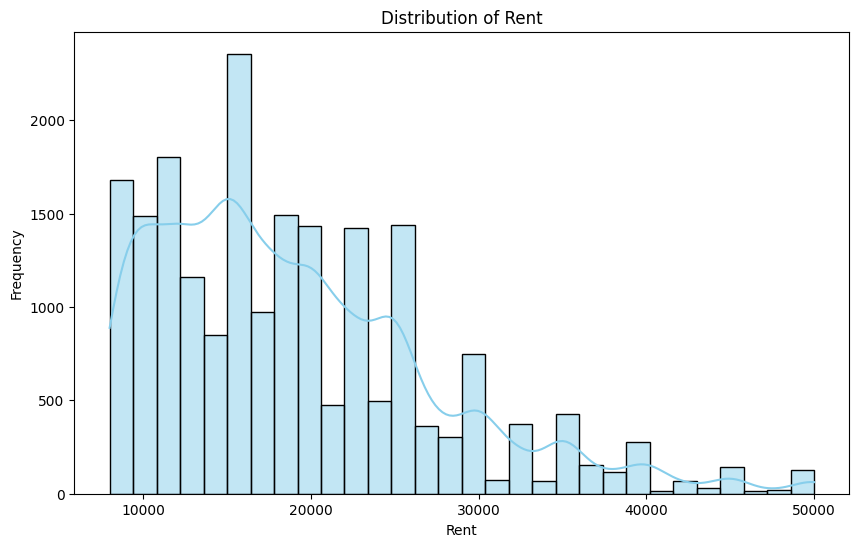

In [441]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is the name of your DataFrame

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the histogram for 'rent'
sns.histplot(data['rent'], bins=30, kde=True, color='skyblue', ax=ax)

# Adding labels and title
ax.set_xlabel('Rent')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Rent')

plt.show()


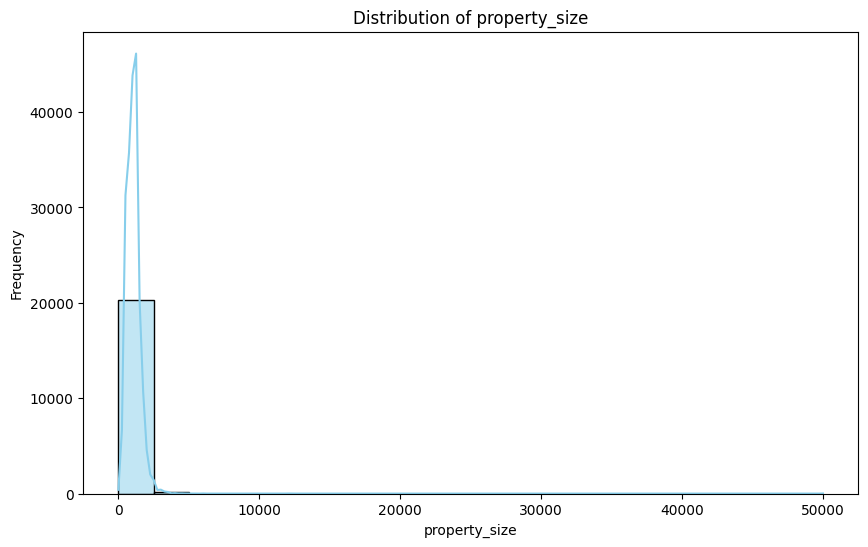

In [442]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is the name of your DataFrame

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the histogram for 'rent'
sns.histplot(data['property_size'], bins=20, kde=True, color='skyblue', ax=ax)

# Adding labels and title
ax.set_xlabel('property_size')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of property_size')

plt.show()


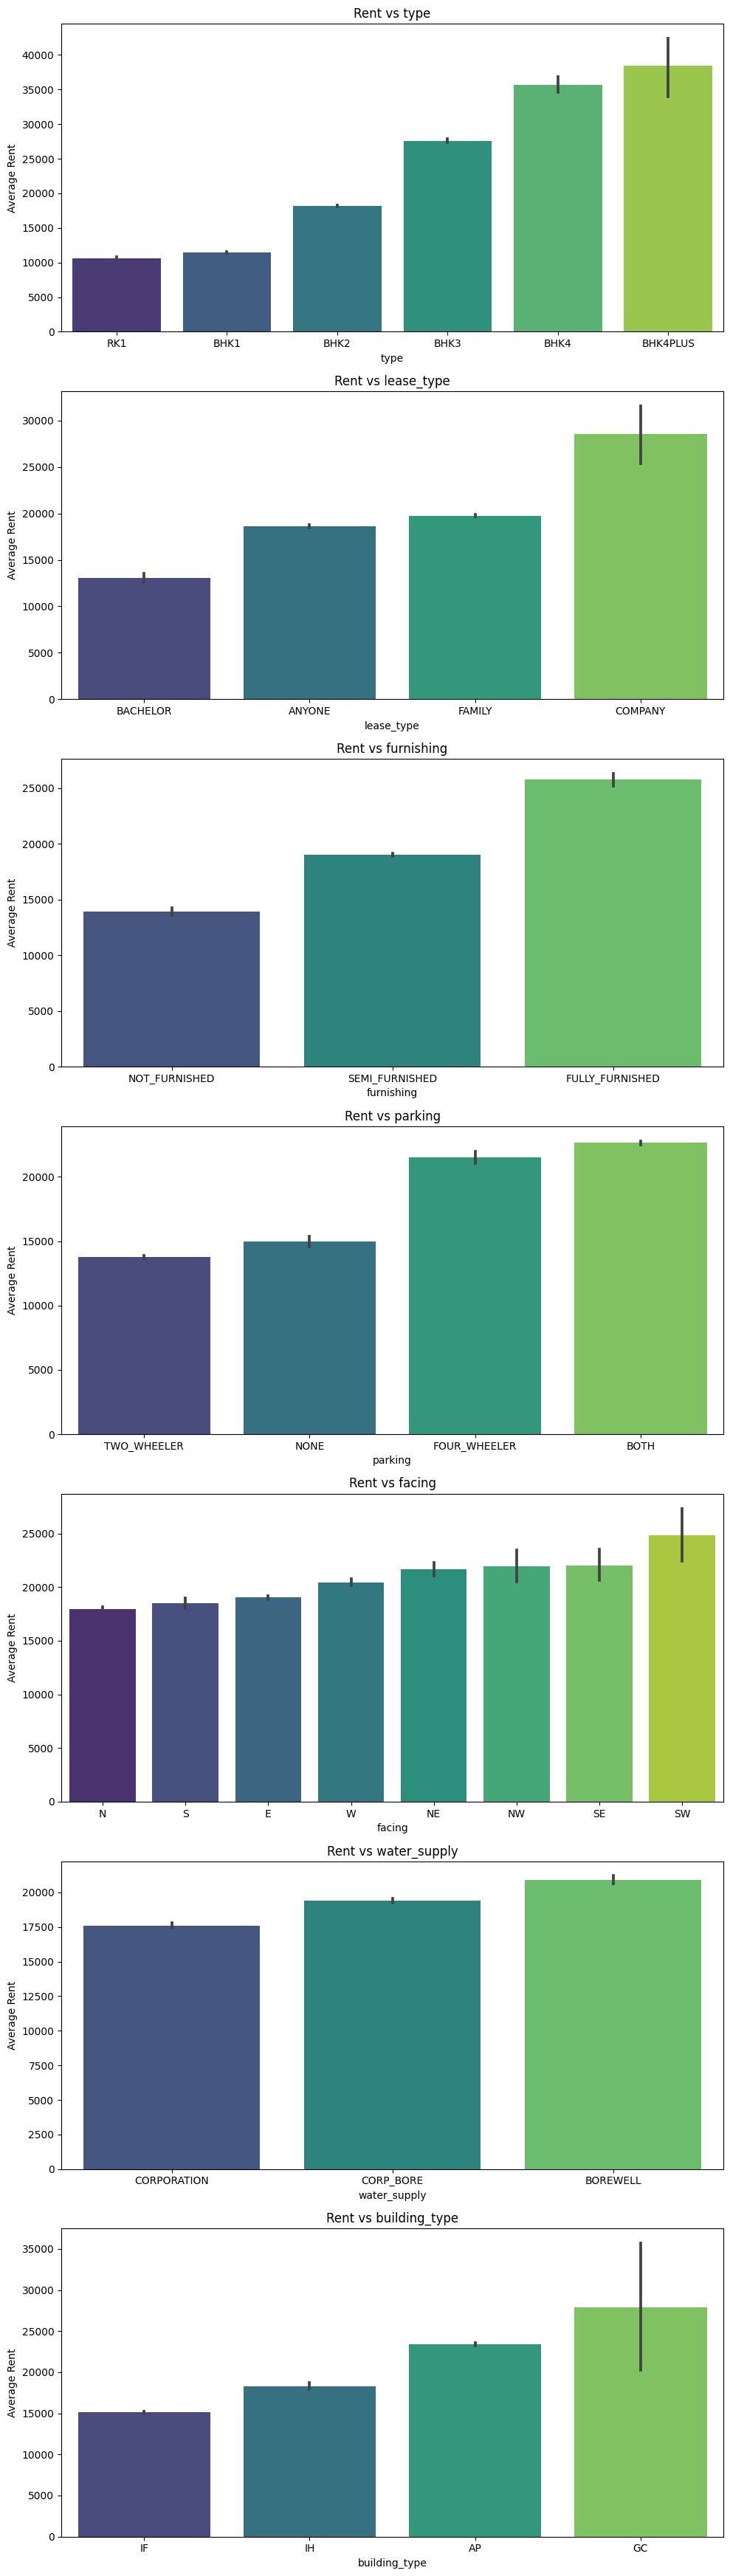

In [443]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is the name of your DataFrame

# List of categorical columns
categorical_columns = ['type', 'lease_type', 'furnishing', 'parking', 'facing', 'water_supply', 'building_type']

# Set up subplots
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 5 * len(categorical_columns)))

# Loop through categorical columns and create bar plots
for i, column in enumerate(categorical_columns):
    # Calculate average rent for each category and sort by rent
    average_rent_by_category = data.groupby(column)['rent'].mean().sort_values()

    sns.barplot(x=column, y='rent', data=data, ax=axes[i], order=average_rent_by_category.index, palette='viridis')
    axes[i].set_title(f'Rent vs {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Average Rent')

plt.tight_layout()
plt.show()


<ipython-input-444-d39e77836912>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='rent', data=data, ax=axes[i], ci=None, palette='viridis')
<ipython-input-444-d39e77836912>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='rent', data=data, ax=axes[i], ci=None, palette='viridis')
<ipython-input-444-d39e77836912>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='rent', data=data, ax=axes[i], ci=None, palette='viridis')
<ipython-input-444-d39e77836912>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='rent', data=data, ax=axes[i], ci=None, palette='viridis')
<ipython-input-444-d39e77836912>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barp

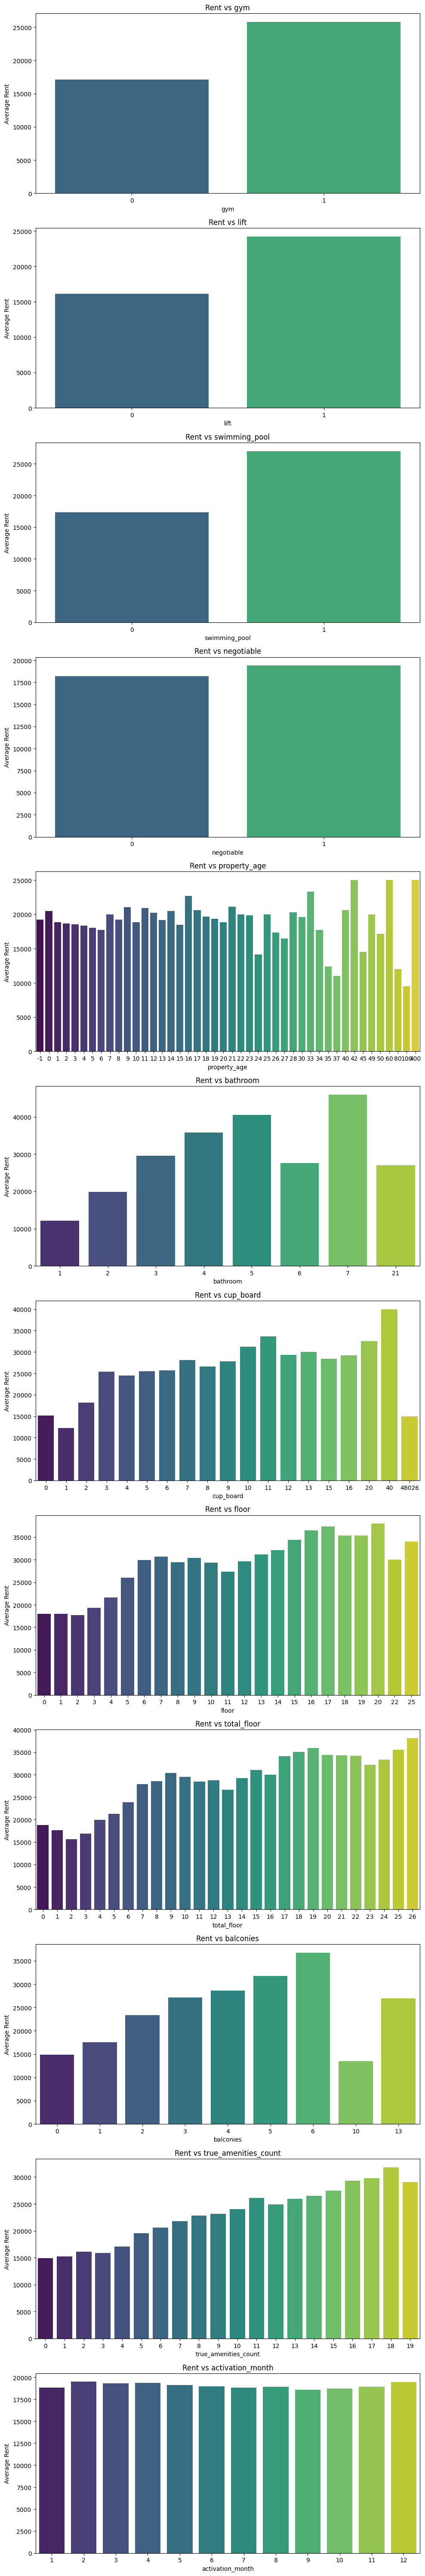

In [444]:
# List of columns to plot
columns_to_plot = ['gym', 'lift', 'swimming_pool', 'negotiable', 'property_age',
                   'bathroom', 'cup_board', 'floor', 'total_floor', 'balconies', 'true_amenities_count', 'activation_month']

# Set up subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(10, 5 * len(columns_to_plot)))

# Loop through columns and create bar plots
for i, column in enumerate(columns_to_plot):
    sns.barplot(x=column, y='rent', data=data, ax=axes[i], ci=None, palette='viridis')
    axes[i].set_title(f'Rent vs {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Average Rent')

plt.tight_layout()
plt.show()


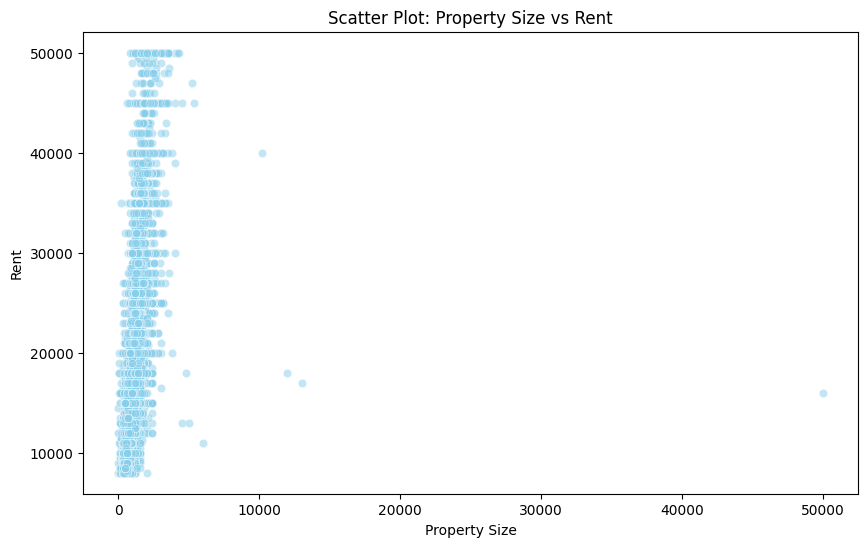

In [445]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is the name of your DataFrame

# Set up the figure
plt.figure(figsize=(10, 6))

# Scatter plot for 'property_size' vs 'rent'
sns.scatterplot(x='property_size', y='rent', data=data, alpha=0.5, color='skyblue')

# Adding labels and title
plt.xlabel('Property Size')
plt.ylabel('Rent')
plt.title('Scatter Plot: Property Size vs Rent')

plt.show()


<ipython-input-446-c7462e52d902>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='locality', y='rent', data=data_top_localities, ci=None, order=top_localities, palette='viridis')


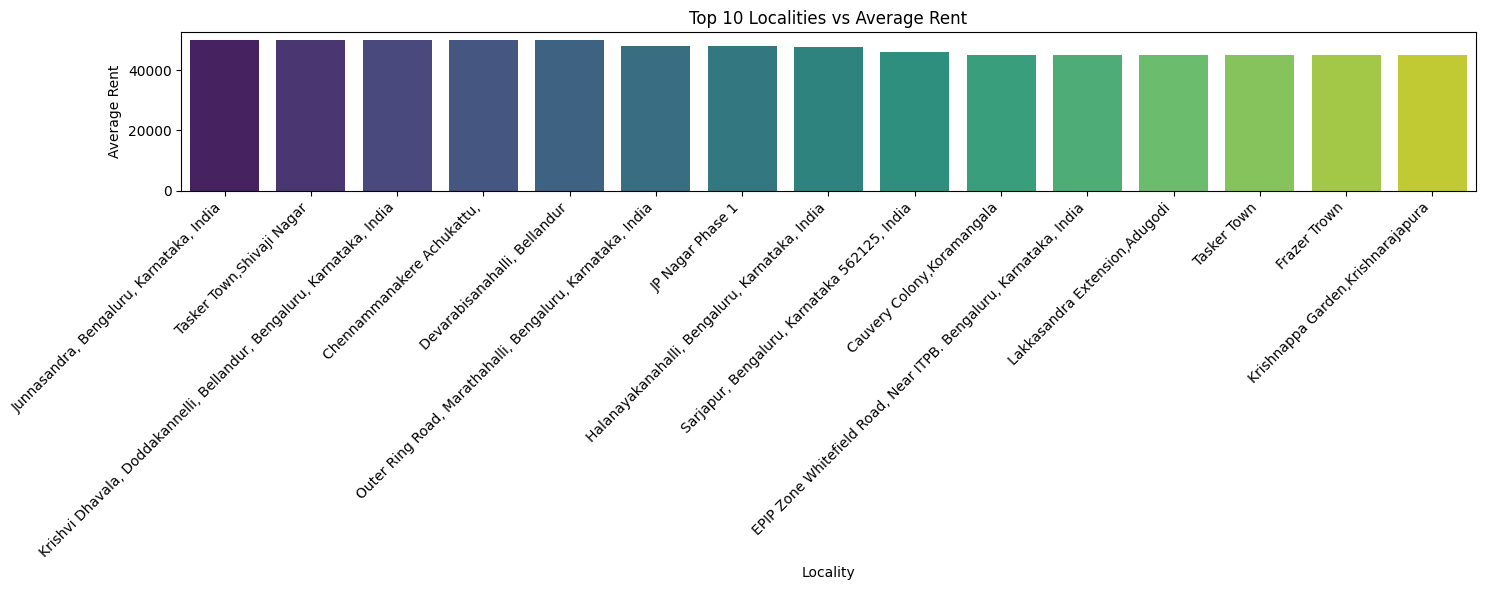

In [446]:
# Calculate the average rent for each locality and sort by rent
average_rent_by_locality = data.groupby('locality')['rent'].mean().sort_values(ascending=False)

# Select the top 10 localities
top_localities = average_rent_by_locality.head(15).index

# Filter the data for the top localities
data_top_localities = data[data['locality'].isin(top_localities)]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(15, 6))

# Create the bar plot for 'locality' vs 'rent'
sns.barplot(x='locality', y='rent', data=data_top_localities, ci=None, order=top_localities, palette='viridis')

# Adding labels and title
ax.set_xlabel('Locality')
ax.set_ylabel('Average Rent')
ax.set_title('Top 10 Localities vs Average Rent')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


<ipython-input-447-c2b8fd224a66>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


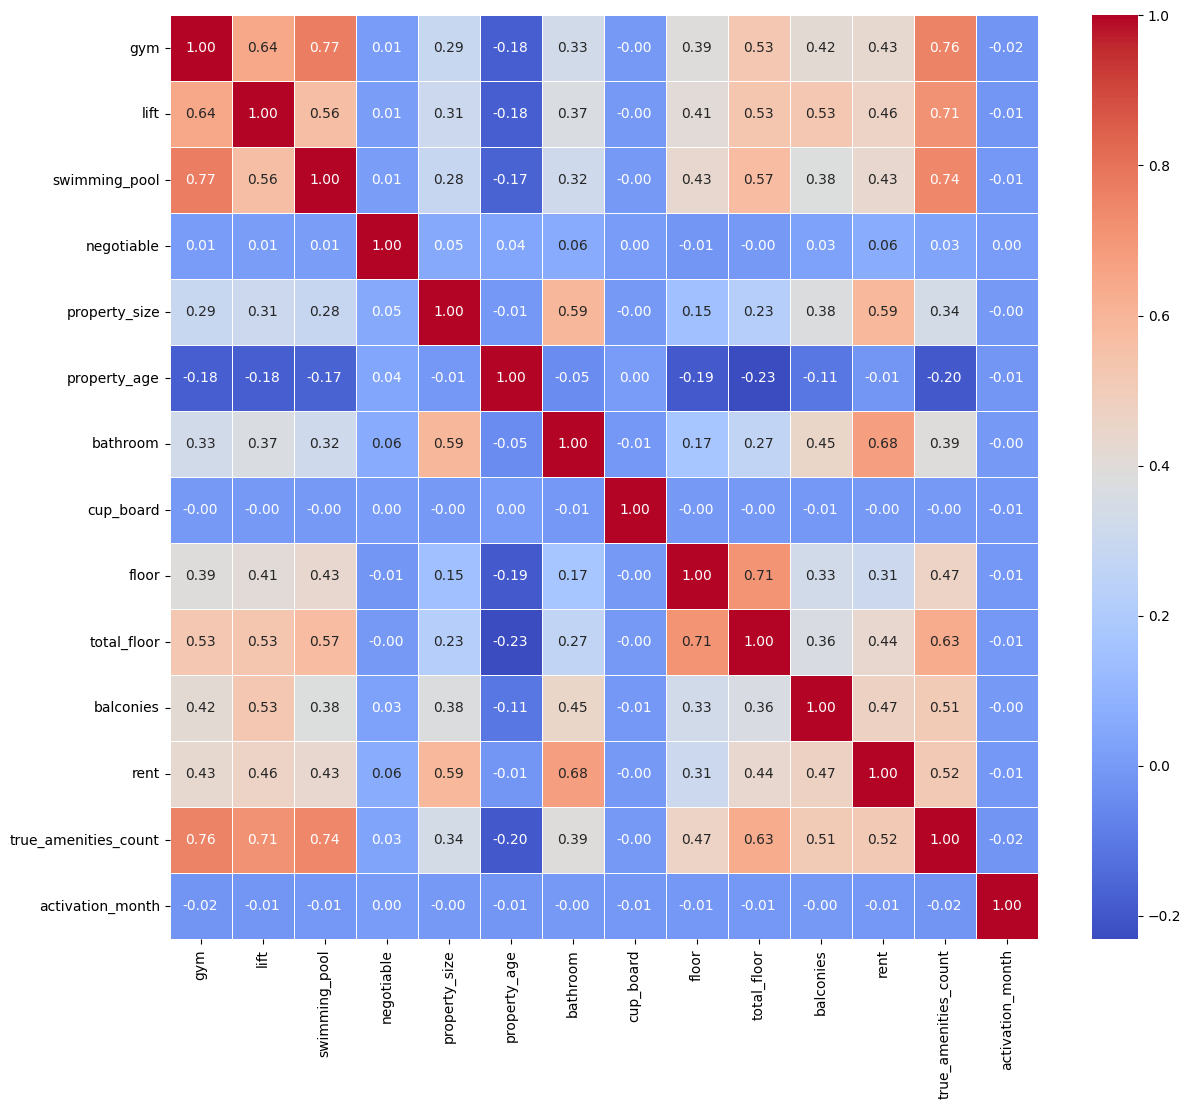

In [447]:
# Create a correlation matrix (replace 'data' with your DataFrame)
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.show()


In [448]:
data.drop(columns = 'activation_month', inplace = True)

# **Encoding Categorical Variables**

In [449]:
data

,type,locality,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,true_amenities_count
1,BHK2,Bellandur,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4,2,NE,2,3,4,CORPORATION,AP,2,22000,8
2,BHK3,Thiruvanmiyur,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6,3,E,3,1,5,CORP_BORE,AP,3,28000,6
3,BHK1,Attiguppe,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3,1,E,1,1,2,CORPORATION,IH,0,8000,0
4,BHK3,Kodihalli,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15,3,E,4,0,0,CORPORATION,IH,1,45000,3
5,BHK1,"Seetharampalya,Hoodi",FAMILY,1,1,1,1,SEMI_FURNISHED,BOTH,1080,0,2,E,1,3,5,CORP_BORE,AP,2,18000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20527,BHK2,"Gattigere,RR Nagar",ANYONE,1,1,1,1,SEMI_FURNISHED,BOTH,1650,1,3,E,3,4,4,BOREWELL,AP,2,25000,10
20528,BHK2,Koramangala 4th Block,ANYONE,0,0,0,1,SEMI_FURNISHED,BOTH,1000,10,2,N,2,1,2,CORPORATION,IH,2,30000,4
20529,BHK2,Kumaraswamy Layout,FAMILY,1,1,0,1,SEMI_FURNISHED,BOTH,1000,0,2,W,2,5,5,BOREWELL,AP,2,16000,8
20530,BHK2,Indiranagar,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1000,5,2,E,2,2,4,CORP_BORE,AP,3,30000,10


In [450]:
data['building_type'].value_counts() # two, none, 4 , both

IF    9194
AP    8808
IH    2376
GC      17
Name: building_type, dtype: int64

In [451]:
#LEBEL ENCODING (ORDER IS THERE SO I AM GOING FOR THIS , HOW I FIND HERE ORDER IS THERE I REFER THE VS PLOT THERE SHOWING A ORDER BAR PLOT)
data['type'] = data['type'].map({'RK1':0,'BHK1':1,'BHK2':2,'BHK3':3,'BHK4':4,'BHK4PLUS':5})
data['lease_type'] = data['lease_type'].map({'BACHELOR':0,'ANYONE':1,'FAMILY':2,'COMPANY':3})
data['furnishing'] = data['furnishing'].map({'NOT_FURNISHED':0,'SEMI_FURNISHED':1,'FULLY_FURNISHED':2})
data['parking'] = data['parking'].map({'TWO_WHEELER':0,'NONE':1,'FOUR_WHEELER':2,'BOTH':3})
data['facing'] = data['facing'].map({'N':0,'S':1,'E':2,'W':3, 'NE':4, 'NW':5, 'SE':6, 'SW':7})
data['water_supply'] = data['water_supply'].map({'CORPORATION':0,'CORP_BORE':1,'BOREWELL':2})
data['building_type'] = data['building_type'].map({'IF':0,'IH':1,'AP':2,'GC':3})

In [452]:
pip install category_encoders

In [453]:
# Perform leave-one-out encoding for card_type, card_number, and tid
from category_encoders import LeaveOneOutEncoder

looe_encoder = LeaveOneOutEncoder(cols=['locality'])
data = looe_encoder.fit_transform(data, data['rent'])

In [454]:
data

,type,locality,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,true_amenities_count
1,2,26540.972222,1,0,1,0,1,1,3,1400,4,2,4,2,3,4,0,2,2,22000,8
2,3,19054.638147,2,0,1,0,0,1,3,1350,6,3,2,3,1,5,1,2,3,28000,6
3,1,15572.916667,2,0,0,0,1,1,0,600,3,1,2,1,1,2,0,1,0,8000,0
4,3,20157.608696,2,0,0,0,1,1,3,1500,15,3,2,4,0,0,0,1,1,45000,3
5,1,28825.595238,2,1,1,1,1,1,3,1080,0,2,2,1,3,5,1,2,2,18000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20527,2,19125.000000,1,1,1,1,1,1,3,1650,1,3,2,3,4,4,2,2,2,25000,10
20528,2,20957.142857,1,0,0,0,1,1,3,1000,10,2,0,2,1,2,0,1,2,30000,4
20529,2,13625.582938,2,1,1,0,1,1,3,1000,0,2,3,2,5,5,2,2,2,16000,8
20530,2,22152.575107,2,0,1,0,0,1,3,1000,5,2,2,2,2,4,1,2,3,30000,10


# **SPLIT THE DATA**

In [455]:
X = data.drop('rent',axis=1)
y = data['rent']
#splitting the data into training and testing sets with the ratio of 8:2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=70)

In [456]:
print(X_train)
print(X_test)

       type      locality  lease_type  gym  lift  swimming_pool  negotiable  \
13342     3  22000.000000           2    0     1              0           0   
18558     1  22622.469636           2    0     0              0           1   
18485     2  16600.000000           1    0     0              0           1   
3655      2  15285.925350           2    0     0              0           1   
10795     3  21999.500000           1    1     1              0           1   
...     ...           ...         ...  ...   ...            ...         ...   
15076     1  17166.666667           1    1     1              0           1   
5497      0  16867.136150           2    0     0              0           1   
12835     2  20363.069016           1    0     0              0           1   
15343     2  13500.000000           1    0     0              0           1   
12167     3  18653.839161           2    1     1              1           0   

       furnishing  parking  property_size  property

In [457]:
print(len(y_train))
print(len(y_test))

16316
4079


# **SCALE THE DATA**

In [458]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled ,X_test_scaled

(array([[ 1.32167451,  0.67644989,  0.94491486, ...,  1.07740712,
         -0.15161823,  0.16449427],
        [-1.35331666,  0.82035204,  0.94491486, ..., -1.04912462,
         -1.16298498, -0.48709313],
        [-0.01582107, -0.57191878, -0.84072689, ..., -1.04912462,
         -0.15161823, -0.48709313],
        ...,
        [-0.01582107,  0.2980252 , -0.84072689, ..., -1.04912462,
         -0.15161823, -0.48709313],
        [-0.01582107, -1.28857487, -0.84072689, ..., -1.04912462,
         -0.15161823, -0.26989733],
        [ 1.32167451, -0.09711351,  0.94491486, ...,  1.07740712,
          1.87111527,  1.03327748]]),
 array([[ 1.32167451,  0.41605271, -0.84072689, ...,  1.07740712,
          0.85974852,  0.16449427],
        [-0.01582107, -0.00445705, -0.84072689, ..., -1.04912462,
         -1.16298498, -0.92148474],
        [-1.35331666, -0.03496434, -0.84072689, ...,  1.07740712,
         -1.16298498, -1.13868054],
        ...,
        [-0.01582107, -0.52306737,  0.94491486, ..., -

# **MODEL FITING**

In [459]:
# there are 4 steps in fitting a model 1.import, 2.initial, 3.Fit, 4. Prediction


In [460]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

##**Linear regression**

In [461]:
from sklearn.linear_model import LinearRegression #import
linear_model = LinearRegression(fit_intercept=True) #initialise
linear_model.fit(X_train,y_train) #fit - all magic
print(linear_model.predict(X_test))     #predict
print(y_test)

[26629.61333028 16121.85526919 10273.14515194 ... 18110.1883131
 24905.1394386  21915.40700497]
3035     20000
7173     12000
953       8000
12980    40000
16243    35000
         ...  
734      10000
9257     12000
17018    17000
3802     20000
8491     24000
Name: rent, Length: 4079, dtype: int64


In [462]:
linear_model.score(X_test, y_test)

0.44981532864365903

In [463]:
from sklearn.model_selection import cross_val_score
# synatx : cross_val_score(model, fts_train, target_train, bins).mean()
cross_val_linear_model=cross_val_score(linear_model,X_train,y_train,cv=10).mean()
cross_val_linear_model

-173.4599782089345

# **K Nearest Neighbor Regression**

In [464]:
knn_values=np.arange(1,50)
cross_val_knn=[]
for k in knn_values:
  knn_regressor=KNeighborsRegressor(n_neighbors=k)
  knn_regressor.fit(X_train_scaled,y_train)
  print("K value : ", k, " train score : ", knn_regressor.score(X_train_scaled,y_train)  ,"cross_val_score : ", cross_val_score(knn_regressor,X_train_scaled,y_train,cv = 10).mean())
  cross_val_knn.append(cross_val_score(knn_regressor,X_train_scaled,y_train,cv = 10).mean())

K value :  1  train score :  1.0 cross_val_score :  0.43813193048116156
K value :  2  train score :  0.8600828668839078 cross_val_score :  0.5677692337595153
K value :  3  train score :  0.8084842195749988 cross_val_score :  0.6152718282722559
K value :  4  train score :  0.7842229825212085 cross_val_score :  0.6339322672126214
K value :  5  train score :  0.7671207182730472 cross_val_score :  0.6470569997077974
K value :  6  train score :  0.7552741231971423 cross_val_score :  0.6533874708370022
K value :  7  train score :  0.747278219599589 cross_val_score :  0.6603207791331605
K value :  8  train score :  0.7408528487841268 cross_val_score :  0.6636219511132337
K value :  9  train score :  0.7352860329818928 cross_val_score :  0.6672447523685188
K value :  10  train score :  0.7310122543752544 cross_val_score :  0.6704095714640697
K value :  11  train score :  0.7280315243735607 cross_val_score :  0.6711196359690271
K value :  12  train score :  0.7246173180501165 cross_val_score : 

In [465]:
# for model creation and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [466]:
cross_val_knn_regressor=max(cross_val_knn)

In [467]:
print("The best K-Value is 19 and Cross_val_score is",cross_val_knn_regressor )

The best K-Value is 19 and Cross_val_score is 0.6735840393832847


In [468]:
#Implementing K Nearest Neighbor Regression
knn_regressor=KNeighborsRegressor(n_neighbors=19)
knn_regressor.fit(X_train_scaled,y_train)


KNeighborsRegressor(n_neighbors=19)

In [469]:
cross_val_knn_regressor=cross_val_score(knn_regressor,X_train_scaled,y_train,cv=15).mean()
cross_val_knn_regressor

0.6735213696827635

# **Decision Tree Regression**

In [470]:
#Choosing the best of depth Value
from sklearn.tree import DecisionTreeRegressor

max_depth=np.arange(1,20)
cross_val_dt=[]
for d in max_depth:
  dt_regressor= DecisionTreeRegressor(max_depth=d, random_state=0)
  dt_regressor.fit(X_train,y_train)
  print("Depth : ", d, " train Score  : ", dt_regressor.score(X_train,y_train), "cross_val_score : ", cross_val_score(dt_regressor,X_train,y_train,cv = 10).mean())
  cross_val_dt.append(cross_val_score(dt_regressor,X_train,y_train,cv = 10).mean())



Depth :  1  train Score  :  0.3882487349764173 cross_val_score :  0.3876581348706935
Depth :  2  train Score  :  0.5473735095565788 cross_val_score :  0.5464048291273509
Depth :  3  train Score  :  0.6078480175958605 cross_val_score :  0.6056801691631979
Depth :  4  train Score  :  0.6513868919402221 cross_val_score :  0.6471057250104912
Depth :  5  train Score  :  0.6804763520977739 cross_val_score :  0.6715530789301458
Depth :  6  train Score  :  0.7046708785472525 cross_val_score :  0.685492664004165
Depth :  7  train Score  :  0.7270220182367937 cross_val_score :  0.684169049102384
Depth :  8  train Score  :  0.7506083775301715 cross_val_score :  0.681338156192645
Depth :  9  train Score  :  0.774583037175168 cross_val_score :  0.6748806023530819
Depth :  10  train Score  :  0.8013696459707441 cross_val_score :  0.663485149412763
Depth :  11  train Score  :  0.8259512338627415 cross_val_score :  0.6548110228439257
Depth :  12  train Score  :  0.851510985640776 cross_val_score :  0.

In [471]:
cross_val_dt_regressor=max(cross_val_dt)

In [472]:
print("The best depth is 6 and Cross_val_score is:",cross_val_dt_regressor)

The best depth is 6 and Cross_val_score is: 0.685492664004165


In [473]:
# Implementing Decision Tree Regression
dt_regressor=DecisionTreeRegressor(max_depth=6, random_state=0)
dt_regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=6, random_state=0)

In [474]:
cross_val_dt_regressor=cross_val_score(dt_regressor,X_train,y_train,cv=10).mean()
cross_val_dt_regressor

0.685492664004165

In [475]:
ftImp = list(zip(dt_regressor.feature_importances_, data.columns[:-1]))
imp = pd.DataFrame(ftImp, columns = ["Importance","Feature"])
imp.sort_values("Importance",ascending = False,inplace=True)
imp

,Importance,Feature
9,0.816209,property_size
1,0.106032,locality
11,0.035945,bathroom
0,0.017348,type
15,0.013198,total_floor
4,0.003895,lift
7,0.003576,furnishing
10,0.001350,property_age
13,0.001006,cup_board
8,0.000894,parking


# **Random Forest Regression**

In [476]:
#Choosing the best depth value
from sklearn.ensemble import RandomForestRegressor

max_depth=np.array([2,4,8,10,11,12,13,15,18,20])
cross_val_rf=[]
for d in max_depth:
  rf_regressor=RandomForestRegressor(max_depth=d, random_state=0)
  rf_regressor.fit(X_train,y_train)
  print("Depth : ", d, "cross_val_score : ", cross_val_score(rf_regressor,X_train,y_train,cv = 15).mean())
  cross_val_rf.append(cross_val_score(rf_regressor,X_train,y_train,cv = 15).mean())

Depth :  2 cross_val_score :  0.571268705394857
Depth :  4 cross_val_score :  0.6690087773495171
Depth :  8 cross_val_score :  0.7284707158159055
Depth :  10 cross_val_score :  0.7429737313577923
Depth :  11 cross_val_score :  0.7480502029219719
Depth :  12 cross_val_score :  0.7525238221809656
Depth :  13 cross_val_score :  0.7558608394557502
Depth :  15 cross_val_score :  0.760852995473107
Depth :  18 cross_val_score :  0.7638489488736523
Depth :  20 cross_val_score :  0.7648326881714296


In [477]:
cross_val_rf_regressor=max(cross_val_rf)

In [478]:
print("The best depth is 20 and Cross_val_score is:",cross_val_rf_regressor)

The best depth is 20 and Cross_val_score is: 0.7648326881714296


In [479]:
#Implementing Random Forest Regression

rf_regressor=RandomForestRegressor(max_depth=20, random_state=0)
rf_regressor.fit(X_train,y_train)


RandomForestRegressor(max_depth=20, random_state=0)

In [480]:
cross_val_rf_regressor=cross_val_score(rf_regressor,X_train,y_train,cv=15).mean()
cross_val_rf_regressor

0.7648326881714296

# **Extreme Gradient Boosting Regression**

In [481]:
#Choosing the best Learning Rate
import xgboost as xgb

cross_val_xgb=[]
for lr in [0.01,0.05,0.08,0.1,0.2,0.25,0.3]:
  xgb_regressor= xgb.XGBRegressor(learning_rate = lr,n_estimators=100)
  xgb_regressor.fit(X_train,y_train)
  print("Learning rate : ", lr,"cross_val_score:", cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())
  cross_val_xgb.append(cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())

Learning rate :  0.01 cross_val_score: 0.6141765559847331
Learning rate :  0.05 cross_val_score: 0.7592383804622284
Learning rate :  0.08 cross_val_score: 0.7696788762279773
Learning rate :  0.1 cross_val_score: 0.7717474851015947
Learning rate :  0.2 cross_val_score: 0.7773885818276813
Learning rate :  0.25 cross_val_score: 0.774708341867399
Learning rate :  0.3 cross_val_score: 0.7712543257681195


In [482]:
cross_val_xgb_regressor=max(cross_val_xgb)

In [483]:
print("The best Learning rate is 0.2 and Cross_val_score is:",cross_val_xgb_regressor)


The best Learning rate is 0.2 and Cross_val_score is: 0.7773885818276813


In [484]:
#Implementing Extreme Gradient Boosting Regression

xgb_regressor= xgb.XGBRegressor(learning_rate =0.2,n_estimators=100) # initialise the model
xgb_regressor.fit(X_train,y_train) #train the model


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [485]:
cross_val_xgb_regressor=cross_val_score(xgb_regressor,X_train,y_train,cv=15).mean()
cross_val_xgb_regressor

0.7773885818276813

In [486]:
print("Cross Validation Score for Linear Regression Model:",cross_val_linear_model)
print("Cross Validation Score for K-Nearest Neighbors Regression Model:",cross_val_knn_regressor)
print("Cross Validation Score for Decision Tree Regression Model: ",cross_val_dt_regressor)
print("Cross Validation Score for Random Forest Regression Model: ",cross_val_rf_regressor)
print("Cross Validation Score for Extreme-Gradient Boosting Regression Model: ",cross_val_xgb_regressor)

Cross Validation Score for Linear Regression Model: -173.4599782089345
Cross Validation Score for K-Nearest Neighbors Regression Model: 0.6735213696827635
Cross Validation Score for Decision Tree Regression Model:  0.685492664004165
Cross Validation Score for Random Forest Regression Model:  0.7648326881714296
Cross Validation Score for Extreme-Gradient Boosting Regression Model:  0.7773885818276813


# **R2 Score for Machine-Learning Models**

In [487]:
from sklearn.metrics import r2_score

In [488]:
y_pred_lr=linear_model.predict(X_test)
y_pred_knn=knn_regressor.predict(X_test)
y_pred_dt= dt_regressor.predict(X_test)
y_pred_rf=rf_regressor.predict(X_test)
y_pred_xgb=xgb_regressor.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


In [489]:
R2_score_lr=r2_score(y_test,y_pred_lr)
R2_score_knn=r2_score(y_test,y_pred_knn)
R2_score_dt=r2_score(y_test,y_pred_dt)
R2_score_rf=r2_score(y_test,y_pred_rf)
R2_score_xgb=r2_score(y_test,y_pred_xgb)

In [490]:
print("R2 Score for Linear Regression Model:",R2_score_lr)
print("R2 Score for K-Nearest Neighbors Regression Model:",R2_score_knn)
print("R2 Score for Decision Tree Regression Model: ",R2_score_dt)
print("R2 Score for Random Forest Regression Model: ",R2_score_rf)
print("R2 Score for Extreme-Gradient Boosting Regression Model: ",R2_score_xgb)

R2 Score for Linear Regression Model: 0.44981532864365903
R2 Score for K-Nearest Neighbors Regression Model: -3.7469957359248447
R2 Score for Decision Tree Regression Model:  0.692377448230687
R2 Score for Random Forest Regression Model:  0.7825254446145784
R2 Score for Extreme-Gradient Boosting Regression Model:  0.7942294160796308


# **Suggestion to Sellers and buyers-Solving problem statements based on Feature Importance**

In [491]:
xgb_regressor.feature_importances_

array([0.06070424, 0.0482129 , 0.01837709, 0.01003898, 0.06108653,
       0.01532367, 0.0098981 , 0.04635844, 0.0234653 , 0.39503118,
       0.01639239, 0.1260498 , 0.01039502, 0.03512705, 0.00974563,
       0.04008946, 0.02269448, 0.02505395, 0.01344952, 0.01250625],
      dtype=float32)

In [492]:
data.columns

Index(['type', 'locality', 'lease_type', 'gym', 'lift', 'swimming_pool',
       'negotiable', 'furnishing', 'parking', 'property_size', 'property_age',
       'bathroom', 'facing', 'cup_board', 'floor', 'total_floor',
       'water_supply', 'building_type', 'balconies', 'rent',
       'true_amenities_count'],
      dtype='object')

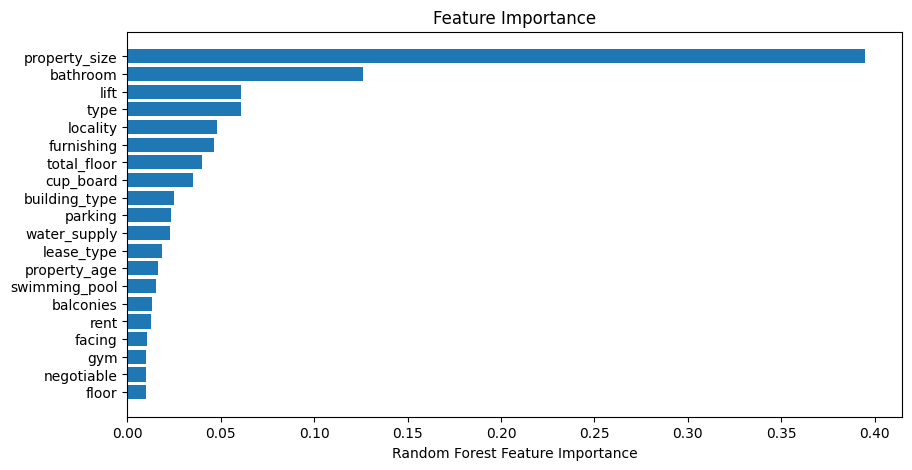

In [493]:
sorted_idx = xgb_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(data.columns[sorted_idx], xgb_regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")
plt.show()

In [494]:
xgb_regressor.feature_importances_

array([0.06070424, 0.0482129 , 0.01837709, 0.01003898, 0.06108653,
       0.01532367, 0.0098981 , 0.04635844, 0.0234653 , 0.39503118,
       0.01639239, 0.1260498 , 0.01039502, 0.03512705, 0.00974563,
       0.04008946, 0.02269448, 0.02505395, 0.01344952, 0.01250625],
      dtype=float32)

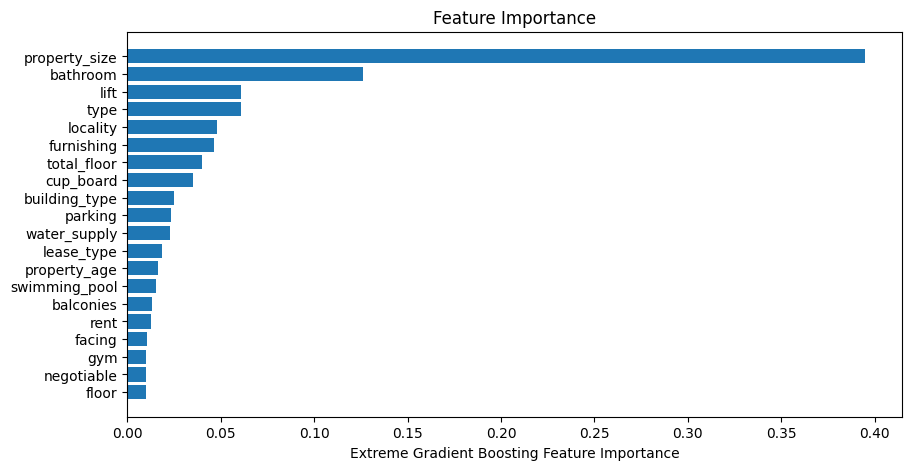

In [495]:

sorted_idx = xgb_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(data.columns[sorted_idx], xgb_regressor.feature_importances_[sorted_idx])
plt.xlabel("Extreme Gradient Boosting Feature Importance")
plt.title("Feature Importance")
plt.show()

# **Evaluate Your System on the Test Set**

In [496]:
test = pd.read_excel('/content/House_Rent_Test.xlsx')

In [497]:
test.head()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies
0,ff8081815df539bc015df947ce976cca,BHK2,Basavanagudi,22-08-2017 09:00,12.941603,77.568156,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1300,1,2,N,2,3,3,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,1
1,ff80818157288e9301572c05651853a6,BHK2,Rajaji Nagar,17-09-2017 16:33,12.998803,77.561887,ANYONE,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,7,1,S,2,0,3,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,0
2,ff8081815f1afc58015f1b831fde166e,BHK1,Jeevan Bima Nagar,14-04-2018 17:27,12.966467,77.661063,ANYONE,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,10,1,S,1,0,1,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,0
3,ff8081816035b31901603f7922c046e0,BHK1,Jayanagar 1st Block,2017-11-12 13:15:00,12.941533,77.592606,ANYONE,0,0,0,0,NOT_FURNISHED,TWO_WHEELER,500,8,1,E,0,2,2,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,0
4,ff8081815c3582f5015c38fc31aa73a4,BHK3,Whitefield Hope Farm Junction,2017-11-07 16:44:00,12.971083,77.751625,ANYONE,1,1,1,1,SEMI_FURNISHED,BOTH,1400,0,3,E,3,3,4,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",BOREWELL,AP,1


In [498]:
test.tail()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies
4495,ff8081815216f51101521aa9d46c191f,BHK2,Hanumanthnagar,2018-10-06 18:22:00,12.941654,77.559999,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,950,2,2,N,2,3,3,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,2
4496,ff8081816098166901609bf52bb702a8,BHK2,Lakkasandra,21-01-2018 14:36,12.942973,77.597738,ANYONE,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,750,10,1,N,2,2,3,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,1
4497,ff808181629ac9860162a7ac1a4253bb,BHK1,"Jeevan Samskruthi Apartment, Shiridi Sai Templ...",30-05-2018 16:10,12.949315,77.713807,ANYONE,0,0,0,1,SEMI_FURNISHED,NONE,500,10,1,W,1,2,3,"{""SC"":false,""INTERCOM"":false,""AC"":false,""PB"":f...",CORP_BORE,IH,0
4498,ff8081815b57c717015b580af22f1bbd,BHK3,Mullur,2018-11-07 16:17:00,12.914104,77.716428,FAMILY,1,1,1,1,SEMI_FURNISHED,BOTH,1450,1,3,N,4,10,10,"{""SC"":false,""INTERCOM"":true,""AC"":false,""PB"":tr...",BOREWELL,AP,3
4499,ff808181615af5c101616150bd28356e,BHK3,Kaikondrahalli,27-03-2018 16:25,12.915296,77.676694,FAMILY,1,1,1,0,SEMI_FURNISHED,FOUR_WHEELER,1500,10,3,E,7,5,8,"{""LIFT"":true,""GYM"":true,""INTERNET"":false,""AC"":...",BOREWELL,AP,3


In [499]:
test.shape

(4500, 24)

In [500]:
test.columns

Index(['id', 'type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'amenities',
       'water_supply', 'building_type', 'balconies'],
      dtype='object')

In [501]:
test.isnull().sum()

id                 0
type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
dtype: int64

In [502]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               4500 non-null   object 
 1   type             4500 non-null   object 
 2   locality         4500 non-null   object 
 3   activation_date  4500 non-null   object 
 4   latitude         4500 non-null   float64
 5   longitude        4500 non-null   float64
 6   lease_type       4500 non-null   object 
 7   gym              4500 non-null   int64  
 8   lift             4500 non-null   int64  
 9   swimming_pool    4500 non-null   int64  
 10  negotiable       4500 non-null   int64  
 11  furnishing       4500 non-null   object 
 12  parking          4500 non-null   object 
 13  property_size    4500 non-null   int64  
 14  property_age     4500 non-null   int64  
 15  bathroom         4500 non-null   int64  
 16  facing           4500 non-null   object 
 17  cup_board     

In [503]:
test.drop(columns = ['id'],inplace=True)

In [504]:
test['type'].value_counts()

BHK2        2524
BHK3         990
BHK1         808
RK1          105
BHK4          66
BHK4PLUS       7
Name: type, dtype: int64

In [505]:
test['activation_date'] = pd.to_datetime(test['activation_date'])

In [506]:
test['bathroom'] = test['bathroom'].astype(int)
test['cup_board'] = test['cup_board'].astype(int)
test['floor'] = test['floor'].astype(int)
test['total_floor'] = test['total_floor'].astype(int)
test['balconies'] = test['balconies'].astype(int)
test['property_age'] = test['property_age'].astype(int)
#test['rent'] = test['rent'].astype(int)

In [507]:
import json

# Assuming 'data' is the name of your DataFrame
test['amenities'] = test['amenities'].apply(json.loads)
test['true_amenities_count'] = test['amenities'].apply(lambda x: list(x.values()).count(True))


In [508]:
test.drop(columns = 'amenities', inplace = True)

In [509]:
test.drop(columns=['activation_date', 'latitude', 'longitude'], inplace=True)
#test.drop(columns=['latitude', 'longitude','prop_age_category'], inplace=True)


In [510]:
#LEBEL ENCODING (ORDER IS THERE SO I AM GOING FOR THIS , HOW I FIND HERE ORDER IS THERE I REFER THE VS PLOT THERE SHOWING A ORDER BAR PLOT)
test['type'] = test['type'].map({'RK1':0,'BHK1':1,'BHK2':2,'BHK3':3,'BHK4':4,'BHK4PLUS':5})
test['lease_type'] = test['lease_type'].map({'BACHELOR':0,'ANYONE':1,'FAMILY':2,'COMPANY':3})
test['furnishing'] = test['furnishing'].map({'NOT_FURNISHED':0,'SEMI_FURNISHED':1,'FULLY_FURNISHED':2})
test['parking'] = test['parking'].map({'TWO_WHEELER':0,'NONE':1,'FOUR_WHEELER':2,'BOTH':3})
test['facing'] = test['facing'].map({'N':0,'S':1,'E':2,'W':3, 'NE':4, 'NW':5, 'SE':6, 'SW':7})
test['water_supply'] = test['water_supply'].map({'CORPORATION':0,'CORP_BORE':1,'BOREWELL':2})
test['building_type'] = test['building_type'].map({'IF':0,'IH':1,'AP':2,'GC':3})

In [511]:
# Perform leave-one-out encoding for card_type, card_number, and tid
from category_encoders import LeaveOneOutEncoder

looe_encoder = LeaveOneOutEncoder(cols=['locality'])
test = looe_encoder.fit_transform(test, test['property_size'])

In [512]:
test

,type,locality,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,true_amenities_count
0,2,973.173077,2,0,1,0,0,1,3,1300,1,2,0,2,3,3,1,2,1,4
1,2,792.159091,1,0,0,0,1,1,0,600,7,1,1,2,0,3,0,0,0,4
2,1,691.777778,1,0,0,0,1,1,0,600,10,1,1,1,0,1,0,0,0,5
3,1,1072.577778,1,0,0,0,0,0,0,500,8,1,2,0,2,2,1,0,0,2
4,3,1522.514286,1,1,1,1,1,1,3,1400,0,3,2,3,3,4,2,2,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,2,700.000000,2,0,0,0,1,1,3,950,2,2,0,2,3,3,1,0,2,3
4496,2,695.000000,1,0,0,0,1,1,0,750,10,1,0,2,2,3,0,0,1,1
4497,1,1072.577778,1,0,0,0,1,1,1,500,10,1,3,1,2,3,1,1,0,1
4498,3,1475.000000,2,1,1,1,1,1,3,1450,1,3,0,4,10,10,2,2,3,9


In [513]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create DMatrix objects for XGBoost

dtrain = xgb.DMatrix(data=X_train, label=y_train, enable_categorical=True)
test = xgb.DMatrix(data=test, enable_categorical=True)

In [514]:
import xgboost as xgb

# Assuming you already have dtrain and dtest defined from previous steps

# Specify the XGBoost parameters such as 'max_depth', 'eta', etc.
params = {
    'max_depth': 5,
    'eta': 0.2,
    'objective': 'reg:squarederror',  # Specify the appropriate objective for your problem
}

# Perform cross-validation with 10 folds
cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,  # You can adjust the number of boosting rounds
    nfold=10,  # Number of cross-validation folds
    metrics={'rmse'},  # Evaluation metric (Root Mean Squared Error)
    early_stopping_rounds=10,  # Optional: Early stopping rounds
    seed=42  # Optional: Seed for reproducibility
)

# Get the best number of boosting rounds
best_num_boost_rounds = cv_results['test-rmse-mean'].idxmin()

# Re-train the model with the best number of boosting rounds
xgb_reg = xgb.train(params, dtrain, num_boost_round=best_num_boost_rounds)

# Make predictions on the test set
y_pred = xgb_reg.predict(test)

In [518]:
def custom_round(x):
    round_value=round(x*100)
    return round_value/100

In [519]:
y_pred1=np.vectorize(custom_round)(y_pred)

In [520]:
y_pred1

array([18496.07, 11098.02,  9659.6 , ...,  9907.42, 24379.45, 30099.01])

In [527]:
submission =  pd.read_excel('/content/House_Rent_Test.xlsx')

Predicted_rent=pd.DataFrame({'id':submission['id'],'rent':y_pred1})

In [528]:
Predicted_rent.to_csv('Submission.csv', index = False)

In [529]:
Submission = pd.read_csv('Submission.csv')
Submission

,id,rent
0,ff8081815df539bc015df947ce976cca,18496.07
1,ff80818157288e9301572c05651853a6,11098.02
2,ff8081815f1afc58015f1b831fde166e,9659.60
3,ff8081816035b31901603f7922c046e0,8597.71
4,ff8081815c3582f5015c38fc31aa73a4,20056.32
...,...,...
4495,ff8081815216f51101521aa9d46c191f,14642.79
4496,ff8081816098166901609bf52bb702a8,12151.46
4497,ff808181629ac9860162a7ac1a4253bb,9907.42
4498,ff8081815b57c717015b580af22f1bbd,24379.45


In [531]:
given_submission =  pd.read_excel('/content/sample submission.xlsx')
#given_submission